In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
def scrap_state_info(state: str) -> dict:
    """
    Retorna informa√ß√µes do estado brasileiro
    :param state: nome estado
    :returns state_dict: dicion√°rio com indicadores do estado
    """
    print(f'picking {state} info...')
    state_url = f'https://www.ibge.gov.br/cidades-e-estados/{state}.html'
    page = requests.get(state_url)


  # Cria um objeto BeautifulSoup a partir do conte√∫do HTML da p√°gina, utilizando o parser 'html.parser'.
    soup = BeautifulSoup(page.content, 'html.parser')
  # Seleciona todos os elementos HTML que possuem a classe 'indicador' e os armazena na vari√°vel 'indicadors'.  
   
   # Cria um dicion√°rio chamado 'state_dict' onde as chaves s√£o os textos encontrados em elementos com a classe 'ind-label'
   # e os valores s√£o os textos encontrados em elementos com a classe 'ind-value'.
    indicadors = soup.select('.indicador')
   
    # Adiciona uma nova entrada ao dicion√°rio 'state_dict' com a chave 'Estado' e o valor do nome do estado passado como argumento.
    state_dict = {
        ind.select('.ind-label')[0].text: ind.select('.ind-value')[0].text
        for ind in indicadors
    }


    state_dict['Estado'] = state
    return state_dict     ## Retorna o dicion√°rio 'state_dict', que agora cont√©m os indicadores e o nome do estado.


    #return [(ind.select('.ind-label')[0].text, ind.select('.ind-value')[0].text) for ind in indicadors]




scrap_state_info('sp')

picking sp info...


{'Governador': 'TARCISIO GOMES DE FREITAS\xa0\xa0\xa0[2023]',
 'Capital': 'S√£o Paulo\xa0\xa0\xa0[2010]',
 'Gent√≠lico': 'paulista',
 '√Årea Territorial': '248.219,485 km¬≤\xa0\xa0\xa0[2022]',
 'Popula√ß√£o residente': '44.411.238 pessoas\xa0\xa0\xa0[2022]',
 'Densidade demogr√°fica': '178,92 hab/km¬≤\xa0\xa0\xa0[2022]',
 'MatriÃÅculas no ensino fundamental': '5.343.271 matr√≠culas\xa0\xa0\xa0[2023]',
 'IDH IÃÅndice de desenvolvimento humano': '0,806\xa0\xa0\xa0[2021]',
 'Total de receitas brutas realizadas': '343.634.435.413,40 R$\xa0\xa0\xa0[2023]',
 'Total de despesas brutas empenhadas': '328.315.580.393,50 R$\xa0\xa0\xa0[2023]',
 'Rendimento mensal domiciliar per capita': '2.492 R$\xa0\xa0\xa0[2023]',
 'Total de ve√≠culos': '33.264.096 ve√≠culos\xa0\xa0\xa0[2023]',
 'Estado': 'sp'}

In [5]:
states = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RR', 'RO', 'RJ', 'RN', 'RS', 'SC', 'SP', 'SE', 'TO']


state_data = [scrap_state_info(state) for state in states] #cria uma lista chamada state_data que cont√©m os resultados da fun√ß√£o scrap_state_info para cada estado na lista states.
# state_data conter√° todas as informa√ß√µes coletadas (ou raspadas) para cada estado.


picking AC info...
picking AL info...
picking AP info...
picking AM info...
picking BA info...
picking CE info...
picking DF info...
picking ES info...
picking GO info...
picking MA info...
picking MT info...
picking MS info...
picking MG info...
picking PA info...
picking PB info...
picking PR info...
picking PE info...
picking PI info...
picking RR info...
picking RO info...
picking RJ info...
picking RN info...
picking RS info...
picking SC info...
picking SP info...
picking SE info...
picking TO info...


In [6]:
df = pd.DataFrame(state_data)
df.head()
#df.info() # nme quantidade de nullo e tipo de coluna


Governador              Capital   Gent√≠lico  \
0          GLADSON DE LIMA CAMELI¬†¬†¬†[2023]  Rio Branco¬†¬†¬†[2010]     acriano   
1  PAULO SURUAGY DO AMARAL DANTAS¬†¬†¬†[2023]      Macei√≥¬†¬†¬†[2010]    alagoano   
2      CL√âCIO LU√çS VILHENA VIEIRA¬†¬†¬†[2023]      Macap√°¬†¬†¬†[2010]   amapaense   
3             WILSON MIRANDA LIMA¬†¬†¬†[2023]      Manaus¬†¬†¬†[2010]  amazonense   
4        JER√îNIMO RODRIGUES SOUZA¬†¬†¬†[2023]    Salvador¬†¬†¬†[2010]      baiano   

             √Årea Territorial          Popula√ß√£o residente  \
0    164.173,429 km¬≤¬†¬†¬†[2022]     830.018 pessoas¬†¬†¬†[2022]   
1     27.830,661 km¬≤¬†¬†¬†[2022]   3.127.683 pessoas¬†¬†¬†[2022]   
2    142.470,762 km¬≤¬†¬†¬†[2022]     733.759 pessoas¬†¬†¬†[2022]   
3  1.559.255,881 km¬≤¬†¬†¬†[2022]   3.941.613 pessoas¬†¬†¬†[2022]   
4    564.760,429 km¬≤¬†¬†¬†[2022]  14.141.626 pessoas¬†¬†¬†[2022]   

     Densidade demogr√°fica MatriÃÅculas no ensino fundamental  \
0    5,06 hab/km¬≤¬†¬†¬†[2022]       147.350 matr√≠culas¬†¬†¬†[2023]   
1  112,38 hab/km¬≤¬†¬†¬†[2022]       439.014 matr√≠culas¬†¬†¬†[2023]   
2    5,15 hab/km¬≤¬†¬†¬†[2022]       131.948 matr√≠culas¬†¬†¬†[2023]   
3    2,53 hab/km¬≤¬†¬†¬†[2022]       692.623 matr√≠culas¬†¬†¬†[2023]   
4   25,04 hab/km¬≤¬†¬†¬†[2022]     1.865.574 matr√≠culas¬†¬†¬†[2023]   

  IDH IÃÅndice de desenvolvimento humano Total de receitas brutas realizadas  \
0                         0,71¬†¬†¬†[2021]       11.137.410.342,21 R$¬†¬†¬†[2023]   
1                        0,684¬†¬†¬†[2021]       20.927.817.222,51 R$¬†¬†¬†[2023]   
2                        0,688¬†¬†¬†[2021]       11.249.572.238,02 R$¬†¬†¬†[2023]   
3                          0,7¬†¬†¬†[2021]       33.030.751.885,07 R$¬†¬†¬†[2023]   
4                        0,691¬†¬†¬†[2021]       80.290.524.858,16 R$¬†¬†¬†[2023]   

  Total de despesas brutas empenhadas Rendimento mensal domiciliar per capita  \
0       10.302.403.420,85 R$¬†¬†¬†[2023]                       1.095 R$¬†¬†¬†[2023]   
1       17.963.587.096,92 R$¬†¬†¬†[2023]                       1.110 R$¬†¬†¬†[2023]   
2        8.505.172.844,49 R$¬†¬†¬†[2023]                       1.520 R$¬†¬†¬†[2023]   
3       30.029.370.828,75 R$¬†¬†¬†[2023]                       1.172 R$¬†¬†¬†[2023]   
4       77.868.037.416,52 R$¬†¬†¬†[2023]                       1.139 R$¬†¬†¬†[2023]   

             Total de ve√≠culos Estado  
0    350.273 ve√≠culos¬†¬†¬†[2023]     AC  
1  1.095.144 ve√≠culos¬†¬†¬†[2023]     AL  
2    242.574 ve√≠culos¬†¬†¬†[2023]     AP  
3  1.130.055 ve√≠culos¬†¬†¬†[2023]     AM  
4  5.120.353 ve√≠culos¬†¬†¬†[2023]     BA

In [7]:
state_df = df.copy ()# boa pr√°tica, quando for auterar um dataframe original e fazer uma c√≥pia dele , caso fa√ßa alguma besteira rs n√£o ter que recarregra o data frame
state_df.columns = ['governador',  'capital', 'gentilico', 'area', 'populacao', 'densidade_demografica', 'matricula_ensino_fundamental', 'idh', 'total_rec_b_realizada', 'total_desp_bru_empenhadas', 'renda_por_capital', 'total_veiculos', 'sigla']
state_df = state_df[['sigla', 'governador', 'populacao', 'area', 'idh', 'renda_por_capital', 'total_veiculos', 'matricula_ensino_fundamental',  'total_desp_bru_empenhadas', 'total_rec_b_realizada' ]]


#limpeza dos dados
state_df = state_df.replace({
    '\.': '',
    ',':'.',
    '\[\d+\]':'',
    'hab/km¬≤': '',
    'km¬≤': '',
    'pessoas': '',
    'matr√≠culas': '',
    'R\$.*':'',
    've√≠culos':''
}, regex = True)
state_df.head()


num_cols = ['populacao', 'area', 'idh', 'renda_por_capital', 'total_veiculos', 'matricula_ensino_fundamental', 'total_desp_bru_empenhadas', 'total_rec_b_realizada']


state_df[num_cols] = state_df[num_cols].apply(lambda x: x.str.strip()) #remover espa√ßo em branco do in√≠cio e d fim. lambda x: x.str.strip(): Essa fun√ß√£o an√¥nima remove espa√ßos em branco do in√≠cio e do final de cada valor em cada coluna que √© acessada.
state_df[num_cols] = state_df[num_cols].apply(pd.to_numeric) #Converter os valores dessas colunas de string para um tipo num√©rico.
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sigla                         27 non-null     object 
 1   governador                    27 non-null     object 
 2   populacao                     27 non-null     int64  
 3   area                          27 non-null     float64
 4   idh                           27 non-null     float64
 5   renda_por_capital             27 non-null     int64  
 6   total_veiculos                27 non-null     int64  
 7   matricula_ensino_fundamental  27 non-null     int64  
 8   total_desp_bru_empenhadas     27 non-null     float64
 9   total_rec_b_realizada         27 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.2+ KB


<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\['
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\['
<>:15: SyntaxWarning: invalid escape sequence '\$'
C:\Users\lady_\AppData\Local\Temp\ipykernel_13644\3035388829.py:8: SyntaxWarning: invalid escape sequence '\.'
  '\.': '',
C:\Users\lady_\AppData\Local\Temp\ipykernel_13644\3035388829.py:10: SyntaxWarning: invalid escape sequence '\['
  '\[\d+\]':'',
C:\Users\lady_\AppData\Local\Temp\ipykernel_13644\3035388829.py:15: SyntaxWarning: invalid escape sequence '\$'
  'R\$.*':'',


In [8]:
duplicates = state_df.duplicated().sum()
print(f'N√∫meros de duplicados: {duplicates}')

N√∫meros de duplicados: 0


In [9]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sigla                         27 non-null     object 
 1   governador                    27 non-null     object 
 2   populacao                     27 non-null     int64  
 3   area                          27 non-null     float64
 4   idh                           27 non-null     float64
 5   renda_por_capital             27 non-null     int64  
 6   total_veiculos                27 non-null     int64  
 7   matricula_ensino_fundamental  27 non-null     int64  
 8   total_desp_bru_empenhadas     27 non-null     float64
 9   total_rec_b_realizada         27 non-null     float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.2+ KB


In [10]:
# Salvar o DataFrame no arquivo CSV
state_df.to_csv('ibge_estados.csv', index=False)

In [11]:
#c√≥pia do DataFrame 
#backup
state_df_backup =state_df.copy()


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Importar dados
dados = pd.read_csv('ibge_estados.csv')

In [14]:
dados.head(10)

sigla                         governador  populacao         area    idh  \
0    AC          GLADSON DE LIMA CAMELI¬†¬†¬†     830018   164173.429  0.710   
1    AL  PAULO SURUAGY DO AMARAL DANTAS¬†¬†¬†    3127683    27830.661  0.684   
2    AP      CL√âCIO LU√çS VILHENA VIEIRA¬†¬†¬†     733759   142470.762  0.688   
3    AM             WILSON MIRANDA LIMA¬†¬†¬†    3941613  1559255.881  0.700   
4    BA        JER√îNIMO RODRIGUES SOUZA¬†¬†¬†   14141626   564760.429  0.691   
5    CE      ELMANO DE FREITAS DA COSTA¬†¬†¬†    8794957   148894.447  0.734   
6    DF     IBANEIS ROCHA BARROS J√öNIOR¬†¬†¬†    2817381     5760.784  0.814   
7    ES          JOS√â RENATO CASAGRANDE¬†¬†¬†    3833712    46074.448  0.771   
8    GO            RONALDO RAMOS CAIADO¬†¬†¬†    7056495   340242.859  0.737   
9    MA   CARLOS ORLEANS BRAND√ÉO J√öNIOR¬†¬†¬†    6776699   329651.496  0.676   

   renda_por_capital  total_veiculos  matricula_ensino_fundamental  \
0               1095          350273                        147350   
1               1110         1095144                        439014   
2               1520          242574                        131948   
3               1172         1130055                        692623   
4               1139         5120353                       1865574   
5               1166         3753826                       1134636   
6               3357         2083081                        361438   
7               1915         2357061                        498357   
8               2017         4726950                        868222   
9                945         2132527                       1045700   

   total_desp_bru_empenhadas  total_rec_b_realizada  
0               1.030240e+10           1.113741e+10  
1               1.796359e+10           2.092782e+10  
2               8.505173e+09           1.124957e+10  
3               3.002937e+10           3.303075e+10  
4               7.786804e+10           8.029052e+10  
5               3.742364e+10           4.612479e+10  
6               3.389714e+10           3.647934e+10  
7               2.509872e+10           3.429154e+10  
8               3.942059e+10           5.782560e+10  
9               2.449601e+10           3.137970e+10

In [15]:
#Resumo estat√≠stico das colunas do DataFrame
dados.describe(include='all')

sigla                 governador     populacao          area  \
count     27                         27  2.700000e+01  2.700000e+01   
unique    27                         27           NaN           NaN   
top       AC  GLADSON DE LIMA CAMELI¬†¬†¬†           NaN           NaN   
freq       1                          1           NaN           NaN   
mean     NaN                        NaN  7.521509e+06  3.152007e+05   
std      NaN                        NaN  8.923992e+06  3.751304e+05   
min      NaN                        NaN  6.367070e+05  5.760784e+03   
25%      NaN                        NaN  2.787197e+06  7.609897e+04   
50%      NaN                        NaN  3.941613e+06  2.236445e+05   
75%      NaN                        NaN  8.926944e+06  3.349472e+05   
max      NaN                        NaN  4.441124e+07  1.559256e+06   

              idh  renda_por_capital  total_veiculos  \
count   27.000000          27.000000    2.700000e+01   
unique        NaN                NaN             NaN   
top           NaN                NaN             NaN   
freq          NaN                NaN             NaN   
mean     0.730148        1670.481481    4.415839e+06   
std      0.039892         571.399521    6.572831e+06   
min      0.676000         945.000000    2.425740e+05   
25%      0.698500        1195.000000    1.163638e+06   
50%      0.728000        1520.000000    2.132527e+06   
75%      0.765500        2023.500000    4.923652e+06   
max      0.814000        3357.000000    3.326410e+07   

        matricula_ensino_fundamental  total_desp_bru_empenhadas  \
count                   2.700000e+01               2.700000e+01   
unique                           NaN                        NaN   
top                              NaN                        NaN   
freq                             NaN                        NaN   
mean                    9.669707e+05               4.807140e+10   
std                     1.059315e+06               6.249644e+10   
min                     1.110960e+05               7.473221e+09   
25%                     3.775270e+05               1.792350e+10   
50%                     5.239960e+05               3.002937e+10   
75%                     1.242606e+06               4.642672e+10   
max                     5.343271e+06               3.283156e+11   

        total_rec_b_realizada  
count            2.700000e+01  
unique                    NaN  
top                       NaN  
freq                      NaN  
mean             5.686567e+10  
std              6.630941e+10  
min              8.846153e+09  
25%              2.181561e+10  
50%              3.429154e+10  
75%              5.963292e+10  
max              3.436344e+11

1. Quais s√£o os estados com as maiores e menores popula√ß√µes?

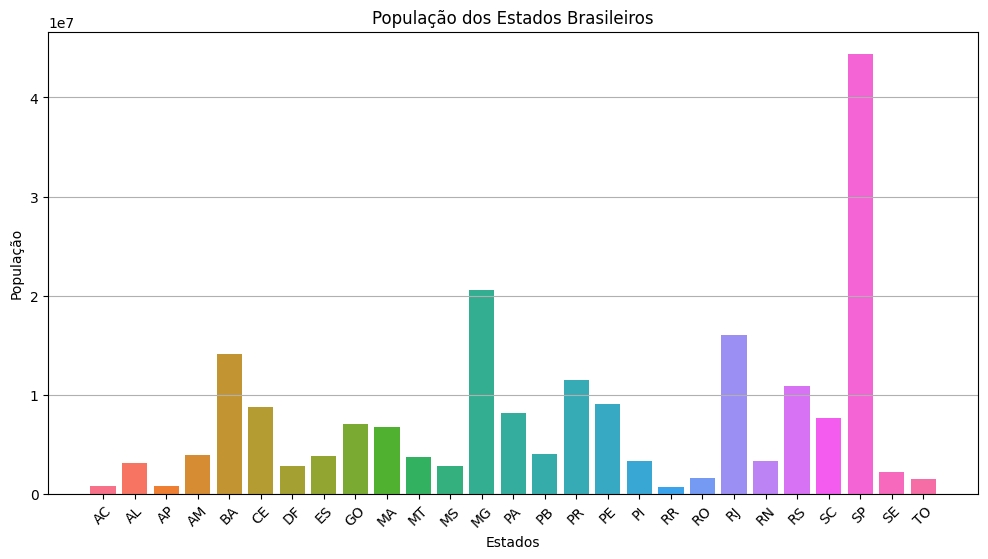

In [16]:
# Gerando uma paleta de cores
colors = sns.color_palette("husl", len(state_df))


# Gr√°fico de Barras
plt.figure(figsize=(12, 6))
plt.bar(state_df['sigla'], state_df['populacao'], color=colors)  # Aplicando a paleta de cores
plt.title('Popula√ß√£o dos Estados Brasileiros')
plt.xlabel('Estados')
plt.ylabel('Popula√ß√£o')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

2. Como a renda por capita varia entre os estados?

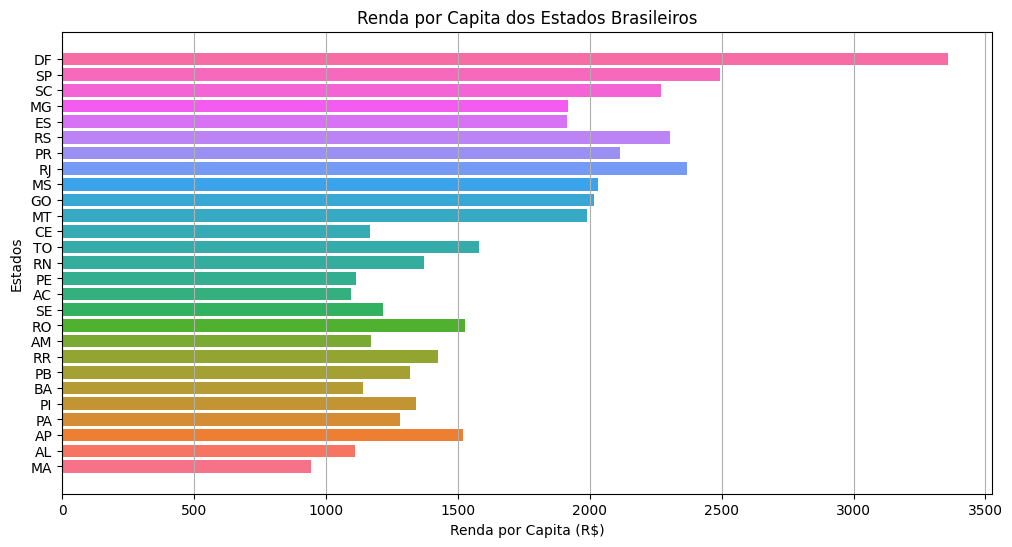

In [17]:
#Gr√°fico de Barras Horizontais 
# Ordenando o DataFrame com base no IDH
state_df_sorted = state_df.sort_values(by='idh')


# Gerando uma paleta de cores
colors = sns.color_palette("husl", len(state_df_sorted))


plt.figure(figsize=(12, 6))
# Usando a lista de cores geradas
plt.barh(state_df_sorted['sigla'], state_df_sorted['renda_por_capital'], color=colors)
plt.title('Renda por Capita dos Estados Brasileiros')
plt.xlabel('Renda por Capita (R$)')
plt.ylabel('Estados')
plt.grid(axis='x')


plt.show()


3. Existe uma correla√ß√£o entre a √°rea territorial dos estados e seus indicadores socioecon√¥micos?

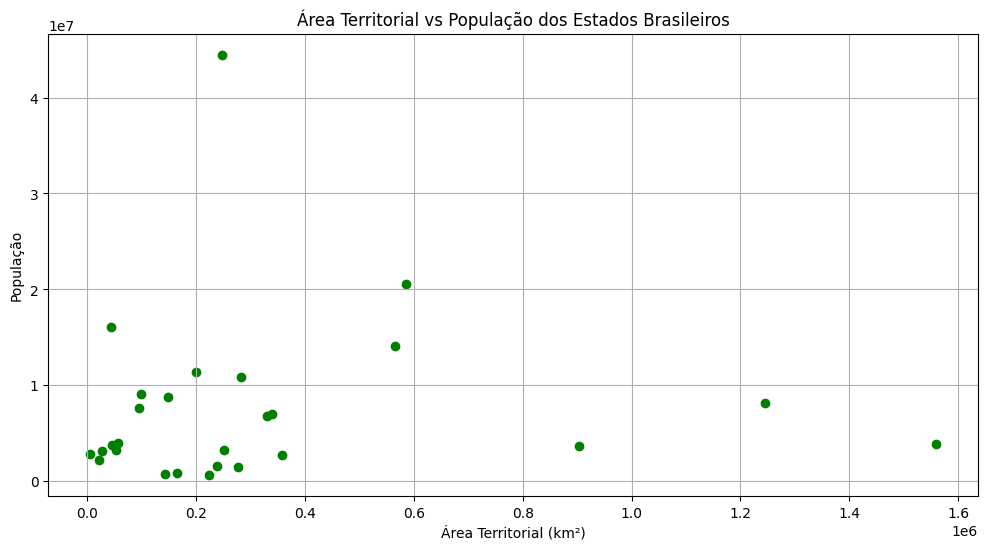

In [18]:
# Gr√°fico de Dispers√£o
plt.figure(figsize=(12, 6))
plt.scatter(state_df['area'], state_df['populacao'], color='green')
plt.title('√Årea Territorial vs Popula√ß√£o dos Estados Brasileiros')
plt.xlabel('√Årea Territorial (km¬≤)')
plt.ylabel('Popula√ß√£o')
plt.grid()
plt.show()

4. Quais s√£o os estados com as maiores disparidades na matr√≠cula no ensino fundamental?

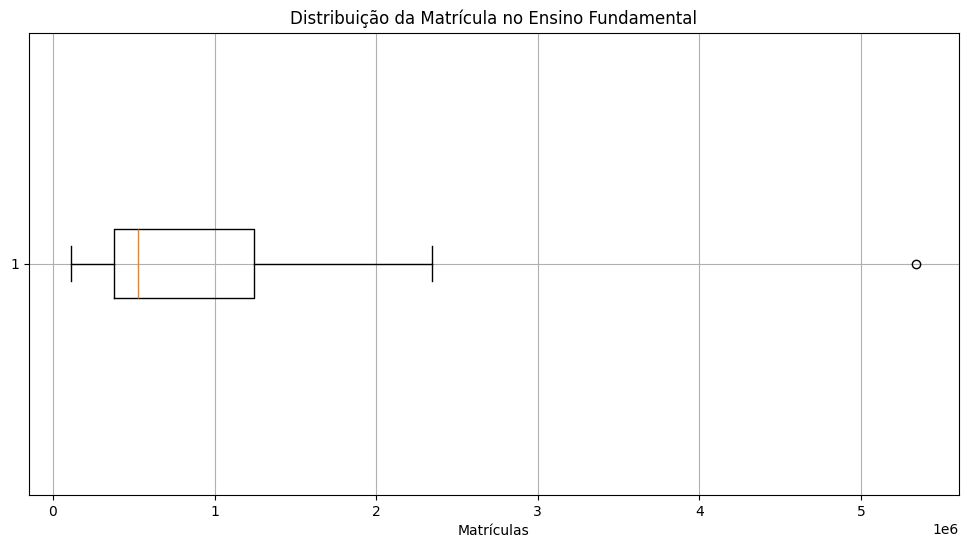

In [19]:
# Gr√°fico de Boxplot (Diagrama de Caixa)
plt.figure(figsize=(12, 6))
plt.boxplot(state_df['matricula_ensino_fundamental'], vert=False)
plt.title('Distribui√ß√£o da Matr√≠cula no Ensino Fundamental')
plt.xlabel('Matr√≠culas')
plt.grid()
plt.show()

5. Como o √çndice de Desenvolvimento Humano (IDH) se relaciona com outros indicadores socioecon√¥micos?

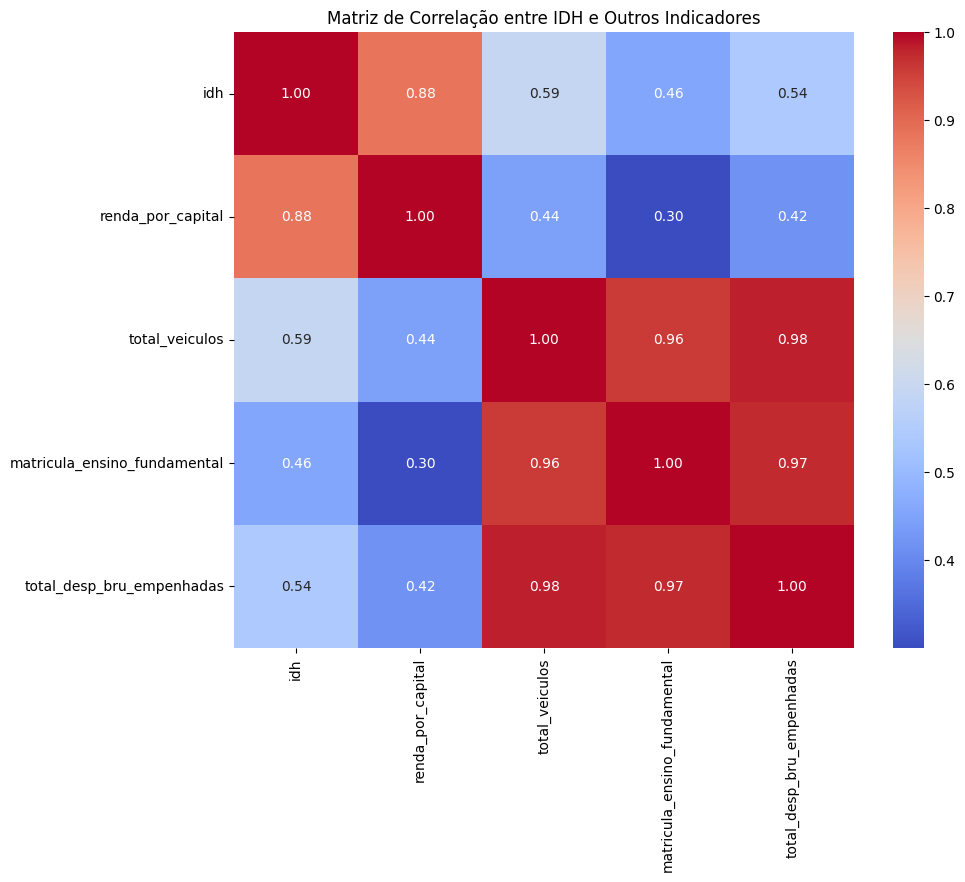

In [20]:
# Gr√°fico de Mapa de Calor (Heatmap)
# Calcular a matriz de correla√ß√£o
correlation_matrix = state_df[['idh', 'renda_por_capital', 'total_veiculos', 'matricula_ensino_fundamental', 'total_desp_bru_empenhadas']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correla√ß√£o entre IDH e Outros Indicadores')
plt.show()

In [23]:


from scipy import stats

A renda per capita varia significativamente entre os estados brasileiros com IDH acima da m√©dia e aqueles com IDH abaixo ou igual √† m√©dia?

Pergunta da Hip√≥tese
Hip√≥tese Nula (ùêª0 ): N√£o h√° diferen√ßa significativa na renda per capita entre os estados com IDH acima da m√©dia e os estados com IDH abaixo ou igual √† m√©dia.

Hip√≥tese Alternativa (ùêª1): H√° uma diferen√ßa significativa na renda per capita entre os estados com IDH acima da m√©dia e os estados com IDH abaixo ou igual √† m√©dia.   com base nisso qual seria o codigo e o grafico

             Grupo  Renda M√©dia  Desvio Padr√£o T-Estat√≠stica   P-Valor
0   Acima da M√©dia  2117.076923     508.621415      5.986245  0.000003
1  Abaixo da M√©dia  1255.785714     171.901214                        
Rejeitamos a hip√≥tese nula (H0): H√° uma diferen√ßa significativa na renda per capita entre os estados.


C:\Users\lady_\AppData\Local\Temp\ipykernel_13644\3853398047.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='idh', y='renda_por_capital', data=df, palette='Set2')


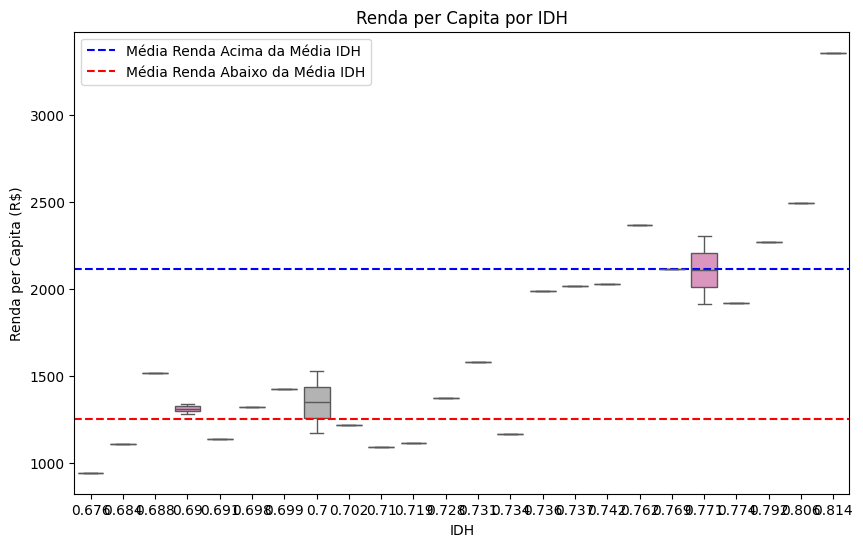

In [26]:
# Gr√°fico de Boxplot Comparativo
df = pd.DataFrame(dados)


# 1. Calcular a m√©dia do IDH
media_idh = df['idh'].mean()


# 2. Separar os estados em dois grupos
grupo_acima_media_idh = df[df['idh'] > media_idh]['renda_por_capital']
grupo_abaixo_media_idh = df[df['idh'] <= media_idh]['renda_por_capital']


# 3. Realizar o teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(grupo_acima_media_idh, grupo_abaixo_media_idh)


# 4. Criar DataFrame para facilitar a visualiza√ß√£o
data_visualizacao = {
    'Grupo': ['Acima da M√©dia', 'Abaixo da M√©dia'],
    'Renda M√©dia': [grupo_acima_media_idh.mean(), grupo_abaixo_media_idh.mean()],
    'Desvio Padr√£o': [grupo_acima_media_idh.std(), grupo_abaixo_media_idh.std()],
    'T-Estat√≠stica': [t_stat, ''],
    'P-Valor': [p_value, '']
}


df_visualizacao = pd.DataFrame(data_visualizacao)


# Exibir resultados
print(df_visualizacao)


# 5. An√°lise das Hip√≥teses
alpha = 0.05  # n√≠vel de signific√¢ncia
if p_value < alpha:
    print("Rejeitamos a hip√≥tese nula (H0): H√° uma diferen√ßa significativa na renda per capita entre os estados.")
else:
    print("N√£o rejeitamos a hip√≥tese nula (H1): N√£o h√° diferen√ßa significativa na renda per capita entre os estados.")


# 6. Visualizar os resultados usando um boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='idh', y='renda_por_capital', data=df, palette='Set2')
plt.title('Renda per Capita por IDH')
plt.xlabel('IDH')
plt.ylabel('Renda per Capita (R$)')
plt.axhline(grupo_acima_media_idh.mean(), color='blue', linestyle='--', label='M√©dia Renda Acima da M√©dia IDH')
plt.axhline(grupo_abaixo_media_idh.mean(), color='red', linestyle='--', label='M√©dia Renda Abaixo da M√©dia IDH')
plt.legend()
plt.show()